# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)

In [4]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [5]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12.058472,23.378317,-11.916806,0.592187,0.097610,4.155688,1.141687,1.013918,136.654623,22.757810
std,9.462698,8.756581,10.112261,0.491431,0.296788,1.284979,0.535362,0.123616,207.444085,21.496018
min,0.000000,2.000000,-147.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.000000,18.000000,-17.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.840000
50%,10.000000,23.000000,-12.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000
75%,15.000000,28.000000,-7.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000
max,208.000000,155.000000,188.000000,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


In [6]:
orders[["wait_time"]].describe()

,wait_time
count,96353.000000
mean,12.058472
std,9.462698
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,208.000000


In [7]:
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,-8.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,-6.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,-18.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,-13.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,-10.0,delivered,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,-11.0,delivered,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,-2.0,delivered,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.0,30.0,-6.0,delivered,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.0,37.0,-21.0,delivered,0,0,2,2,1,359.98,81.18


📈 Plot histograms to get a sense of the distribution of each numerical feature.

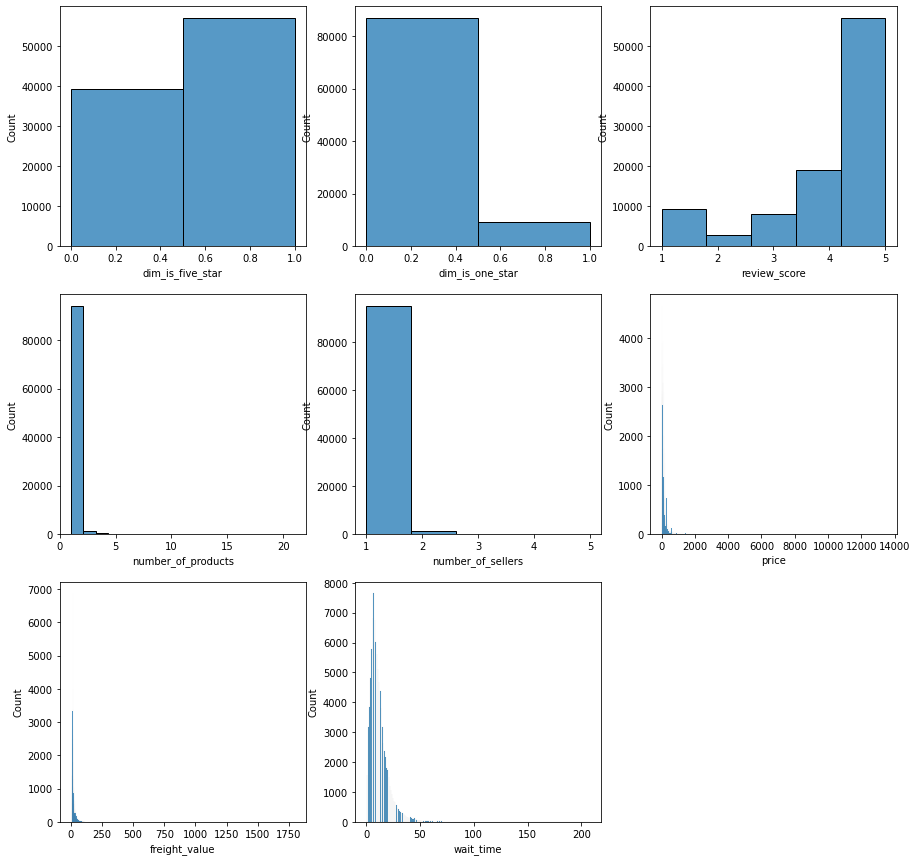

In [11]:
plt.figure(figsize = (15, 15))
plt.subplot(3,3,1)
a = sns.histplot(orders["dim_is_five_star"], bins = 2)
plt.subplot(3,3,2)
b = sns.histplot(orders["dim_is_one_star"], bins = 2)
plt.subplot(3,3,3)
c = sns.histplot(orders["review_score"], bins = 5)
plt.subplot(3,3,4)
d = sns.histplot(orders["number_of_products"])
# d.set_yscale("log")
plt.subplot(3,3,5)
e = sns.histplot(orders["number_of_sellers"], bins = 5)
# e.set_yscale("log")
plt.subplot(3,3,6)
f = sns.histplot(orders["price"])
# f.set_xscale("log")
plt.subplot(3,3,7)
g = sns.histplot(orders["freight_value"])
# g.set_xscale("log")
plt.subplot(3,3,8)
h = sns.histplot(orders["wait_time"])
# g.set_xscale("log")

In [12]:
orders["freight_value"].max()

1794.96

👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

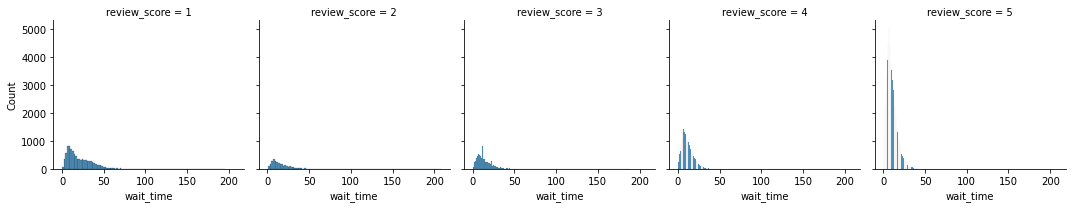

In [13]:
g = sns.FacetGrid(orders, col="review_score")
g.map_dataframe(sns.histplot, x="wait_time")

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

<AxesSubplot:xlabel='price', ylabel='freight_value'>

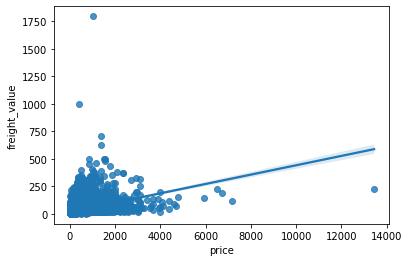

In [14]:
sns.regplot(x = "price", y = "freight_value", data = orders)

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

In [15]:
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,-8.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,-6.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,-18.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,-13.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,-10.0,delivered,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,-11.0,delivered,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,-2.0,delivered,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.0,30.0,-6.0,delivered,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.0,37.0,-21.0,delivered,0,0,2,2,1,359.98,81.18


In [16]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
wait_time,1.000000,0.384691,0.601746,-0.233594,0.305562,-0.333616,-0.019932,-0.040906,0.055057,0.167160
expected_wait_time,0.384691,1.000000,-0.504380,-0.050270,0.034616,-0.052304,0.015701,0.024935,0.076872,0.239141
delay_vs_expected,0.601746,-0.504380,1.000000,-0.175269,0.255923,-0.267027,-0.032218,-0.059850,-0.014651,-0.050456
dim_is_five_star,-0.233594,-0.050270,-0.175269,1.000000,-0.396322,0.791787,-0.072527,-0.070409,-0.012929,-0.058843
dim_is_one_star,0.305562,0.034616,0.255923,-0.396322,1.000000,-0.807700,0.119955,0.102436,0.044792,0.082611
review_score,-0.333616,-0.052304,-0.267027,0.791787,-0.807700,1.000000,-0.123492,-0.116942,-0.034742,-0.090013
number_of_products,-0.019932,0.015701,-0.032218,-0.072527,0.119955,-0.123492,1.000000,0.288560,0.153561,0.438307
number_of_sellers,-0.040906,0.024935,-0.059850,-0.070409,0.102436,-0.116942,0.288560,1.000000,0.043845,0.133658
price,0.055057,0.076872,-0.014651,-0.012929,0.044792,-0.034742,0.153561,0.043845,1.000000,0.410038
freight_value,0.167160,0.239141,-0.050456,-0.058843,0.082611,-0.090013,0.438307,0.133658,0.410038,1.000000


* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [17]:
sample = orders.sample(10000, random_state = 100)

[(0.0, 6.0)]

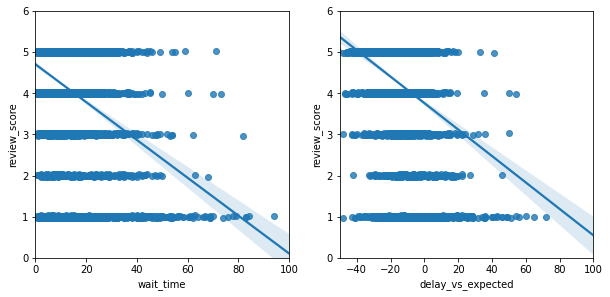

In [18]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
a = sns.regplot(x = "wait_time", y = "review_score", data = sample, y_jitter = 0.03)
a.set(xlim = (0,100))
a.set(ylim = (0, 6))
plt.subplot(2,2,2)
b = sns.regplot(x = "delay_vs_expected", y = "review_score", data = sample, y_jitter = 0.03)
b.set(xlim = (-50, 100))
b.set(ylim = (0, 6))

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> (my answer): a higher coefficient/steeper slope means when the x change, y change faster/bigger magnitude

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

[(0.0, 6.0)]

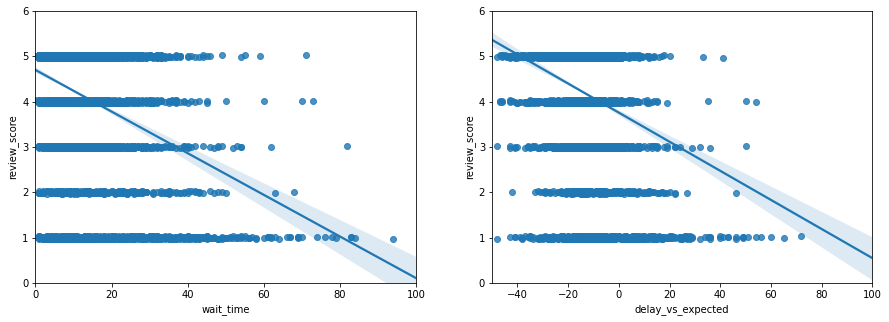

In [19]:
sample = orders.sample(10000, random_state = 100)
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
a = sns.regplot(x = "wait_time", y = "review_score", data = sample, y_jitter = 0.03, ci = 95)
a.set(xlim = (0,100))
a.set(ylim = (0, 6))
plt.subplot(1,2,2)
b = sns.regplot(x = "delay_vs_expected", y = "review_score", data = sample, y_jitter = 0.03, ci = 95)
b.set(xlim = (-50, 100))
b.set(ylim = (0, 6))

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the delivery time is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook